<a href="https://colab.research.google.com/github/iosifdaniel07/-Handwriting-to-Text-Converter-/blob/main/Proiect2_Calcul_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Not generated with ChatGPT!

# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
# Generate time series (sin function + random Gaussian noise)
time = np.arange(0, 500, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.2, size=len(time))

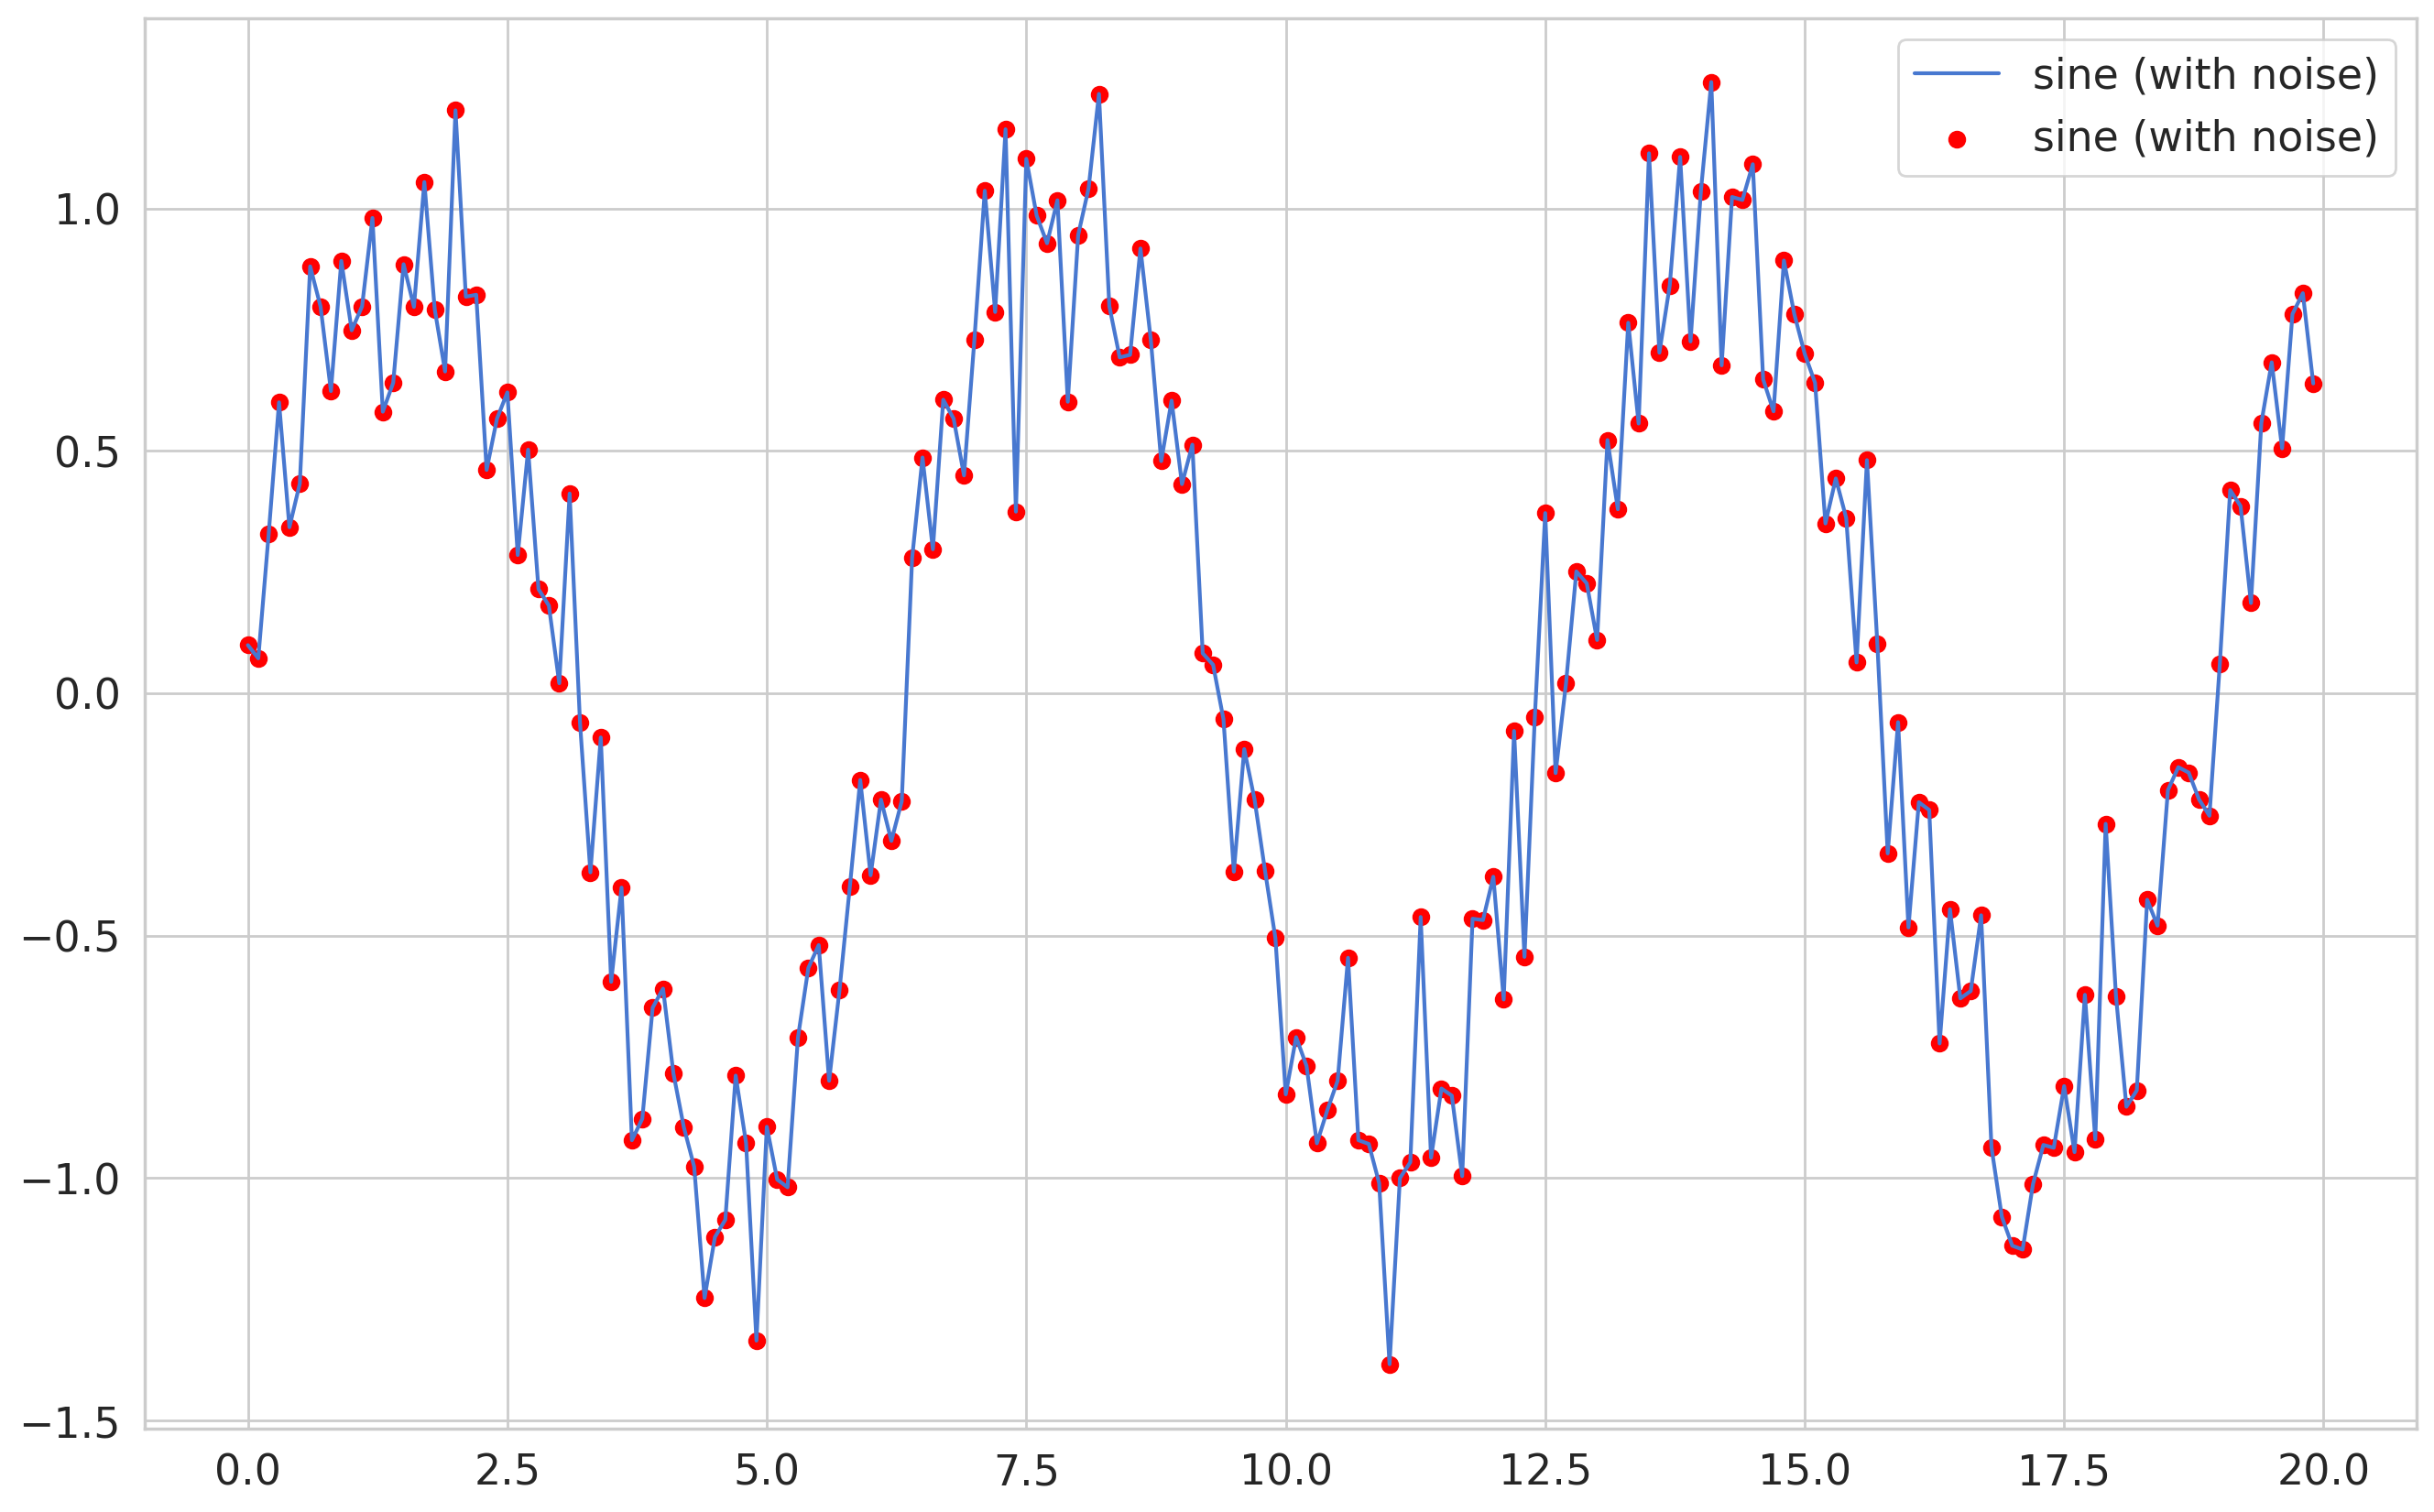

In [ ]:
# Preview the time series
plt.plot(time[0:200], sin[0:200], label='sine (with noise)');
plt.scatter(time[0:200], sin[0:200], label='sine (with noise)', color = "red");
plt.legend();

# Data Preprocessing

In [ ]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.099343
0.1,0.072181
0.2,0.328207
0.3,0.600126
0.4,0.342588


In [ ]:
# Split into training and testing (0.8 - 0.2)
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(len(train), len(test))

4000 1000


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(3990, 10, 1) (3990,)


In [ ]:
X_train[0]
X_train.shape[1]

10

In [ ]:
y_train[0]

0.748787446245404

# Modeling

In [ ]:
# Simple MLP for time series
hidden1_neurons = 20
output1_neurons = 1
LR = 0.01

model = keras.Sequential()
model.add(keras.layers.Dense(hidden1_neurons, activation=keras.activations.sigmoid, input_shape=(10,)))
model.add(keras.layers.Dense(output1_neurons))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(LR))

model.summary()

hidden_cells = 128
LR = 0.01

# # Recurrent Models
# model = keras.Sequential()
# model.add(keras.layers.LSTM(hidden_cells, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(keras.layers.Dense(1))
# model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(LR))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

## Training

In [ ]:
epochs = 20
batch_size = 16

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1020 - val_loss: 0.0514
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0533 - val_loss: 0.0512
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0533 - val_loss: 0.0512
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0533 - val_loss: 0.0510
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0530 - val_loss: 0.0506
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0526 - val_loss: 0.0500
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0520 - val_loss: 0.0494
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0515 - val_loss: 0.0490
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0511 - val_loss: 0.0486
Epoch 10/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0507 - val_loss: 0.0482
Epoch 11/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0504 - val_loss: 0.0477
Epoch 12/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Evaluation

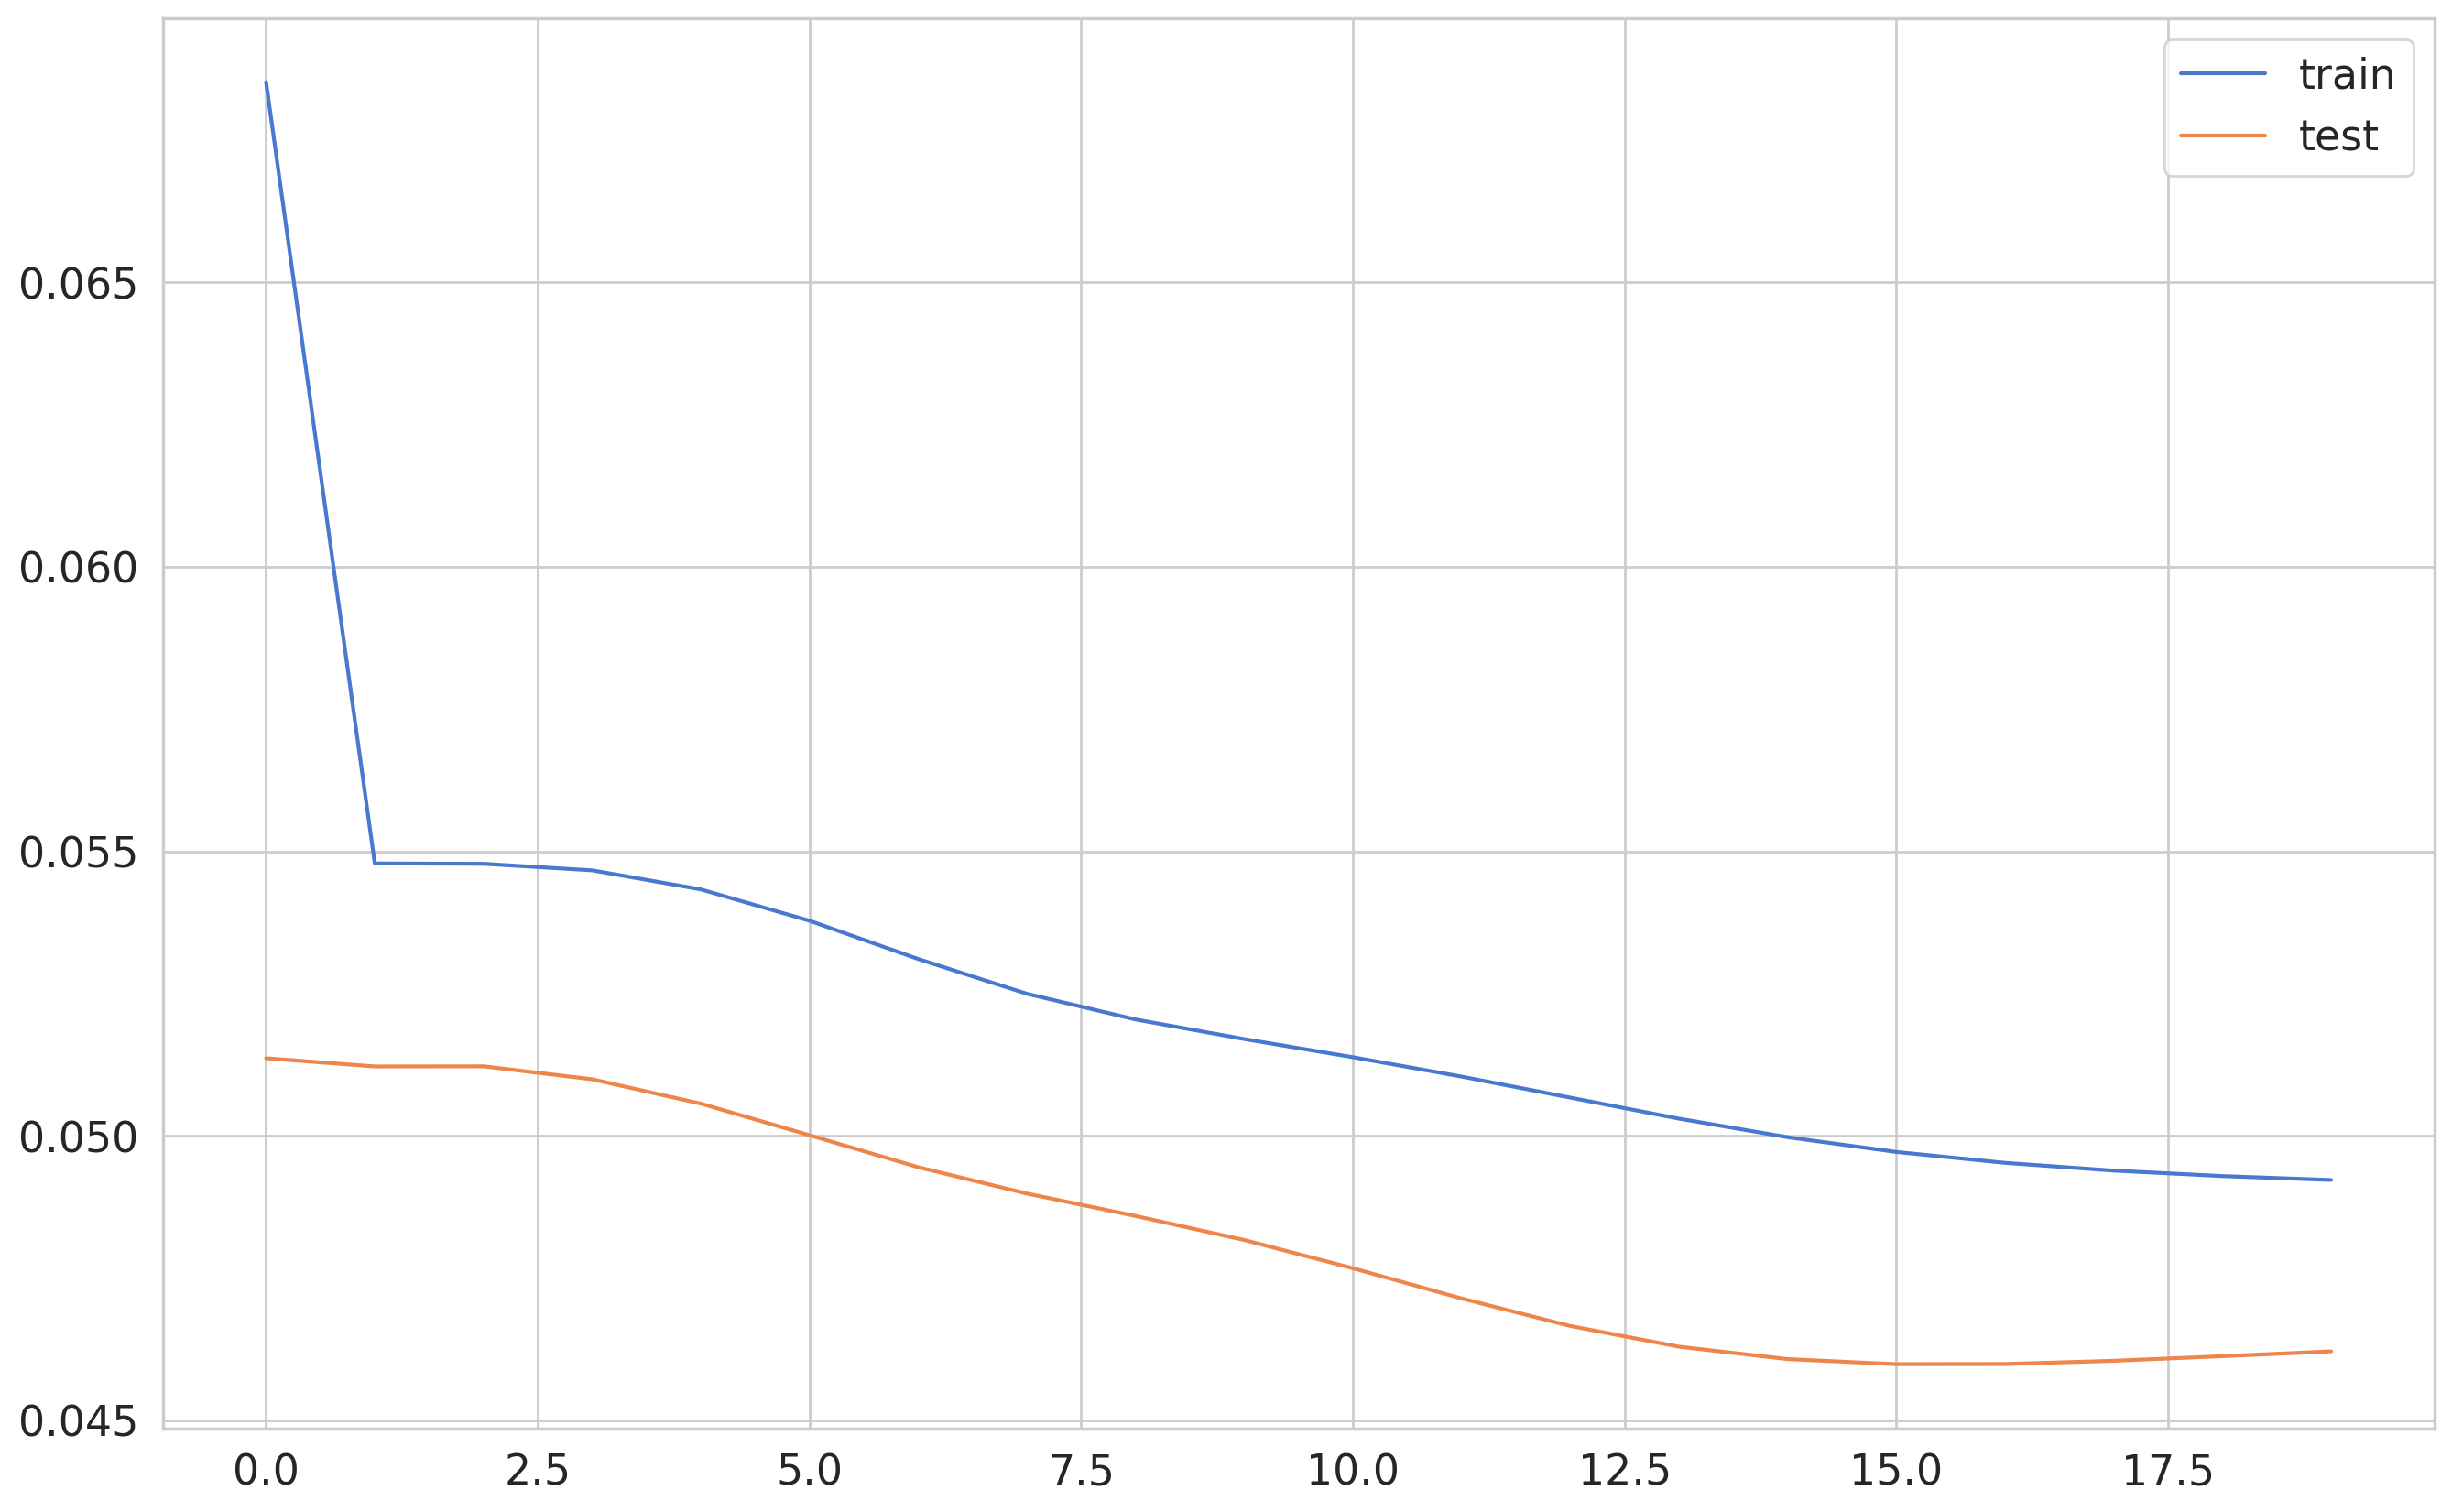

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

Prediction


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(990, 1)

In [ ]:
y_pred.shape

(990, 1)

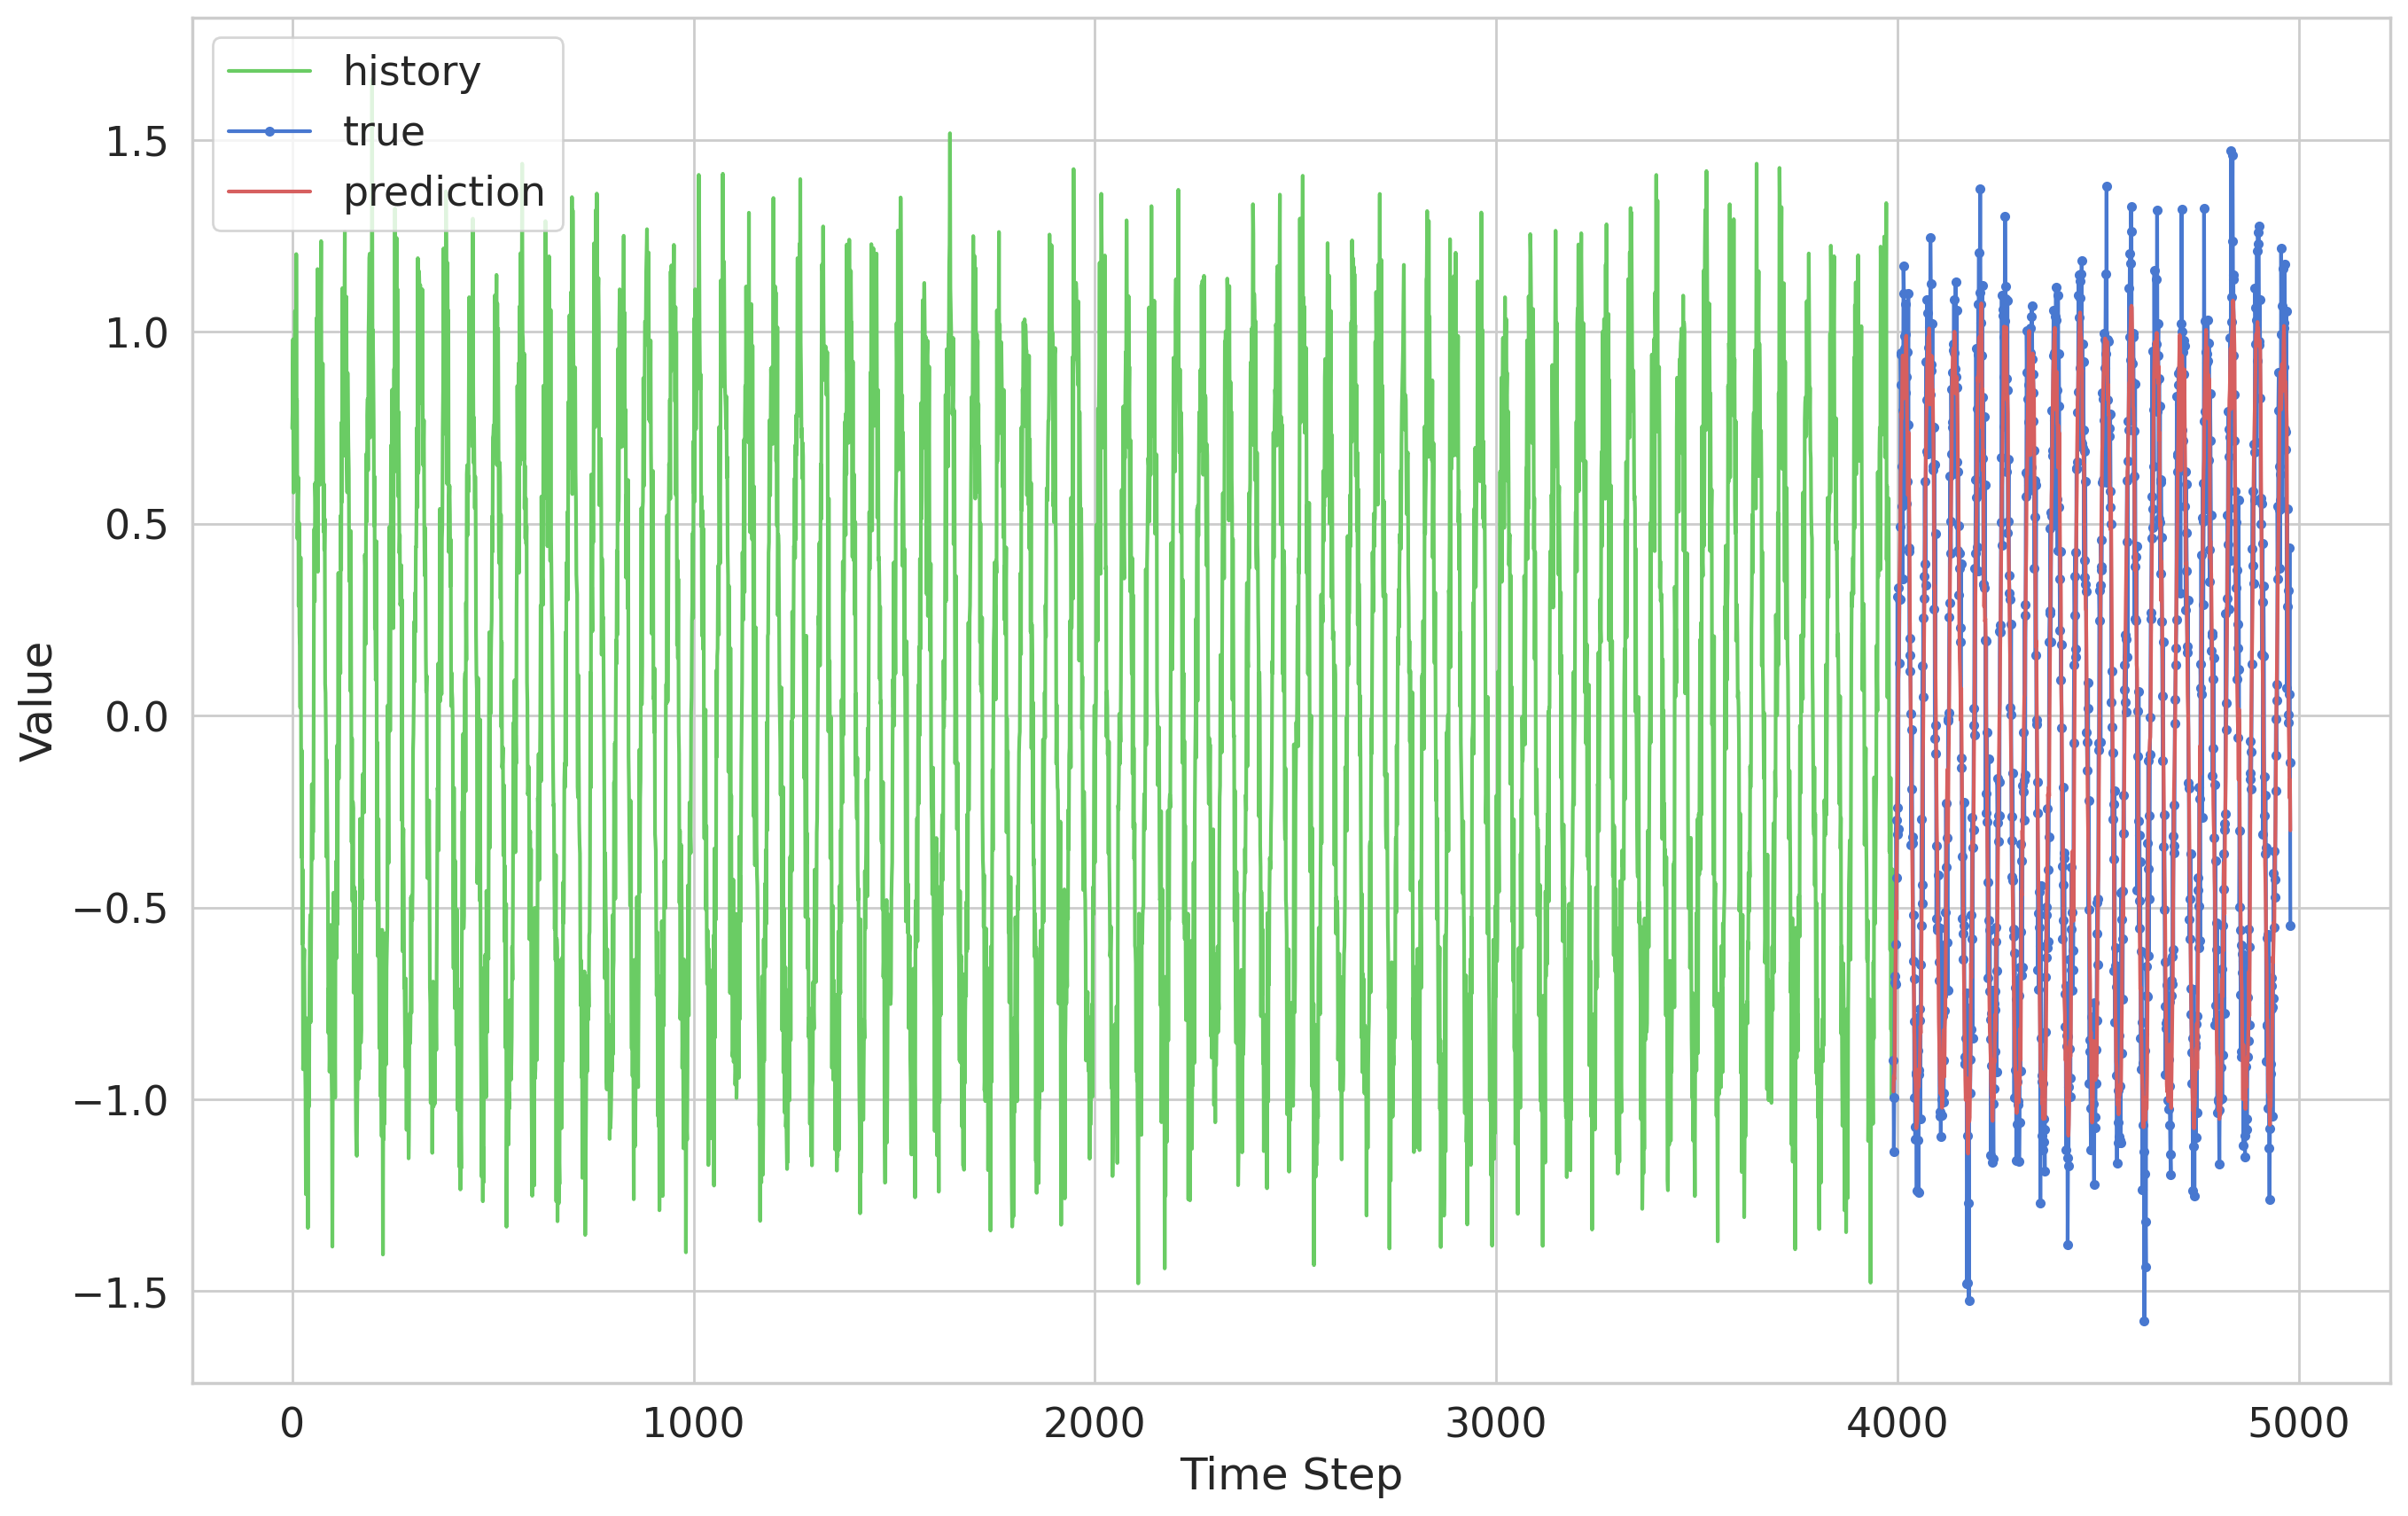

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

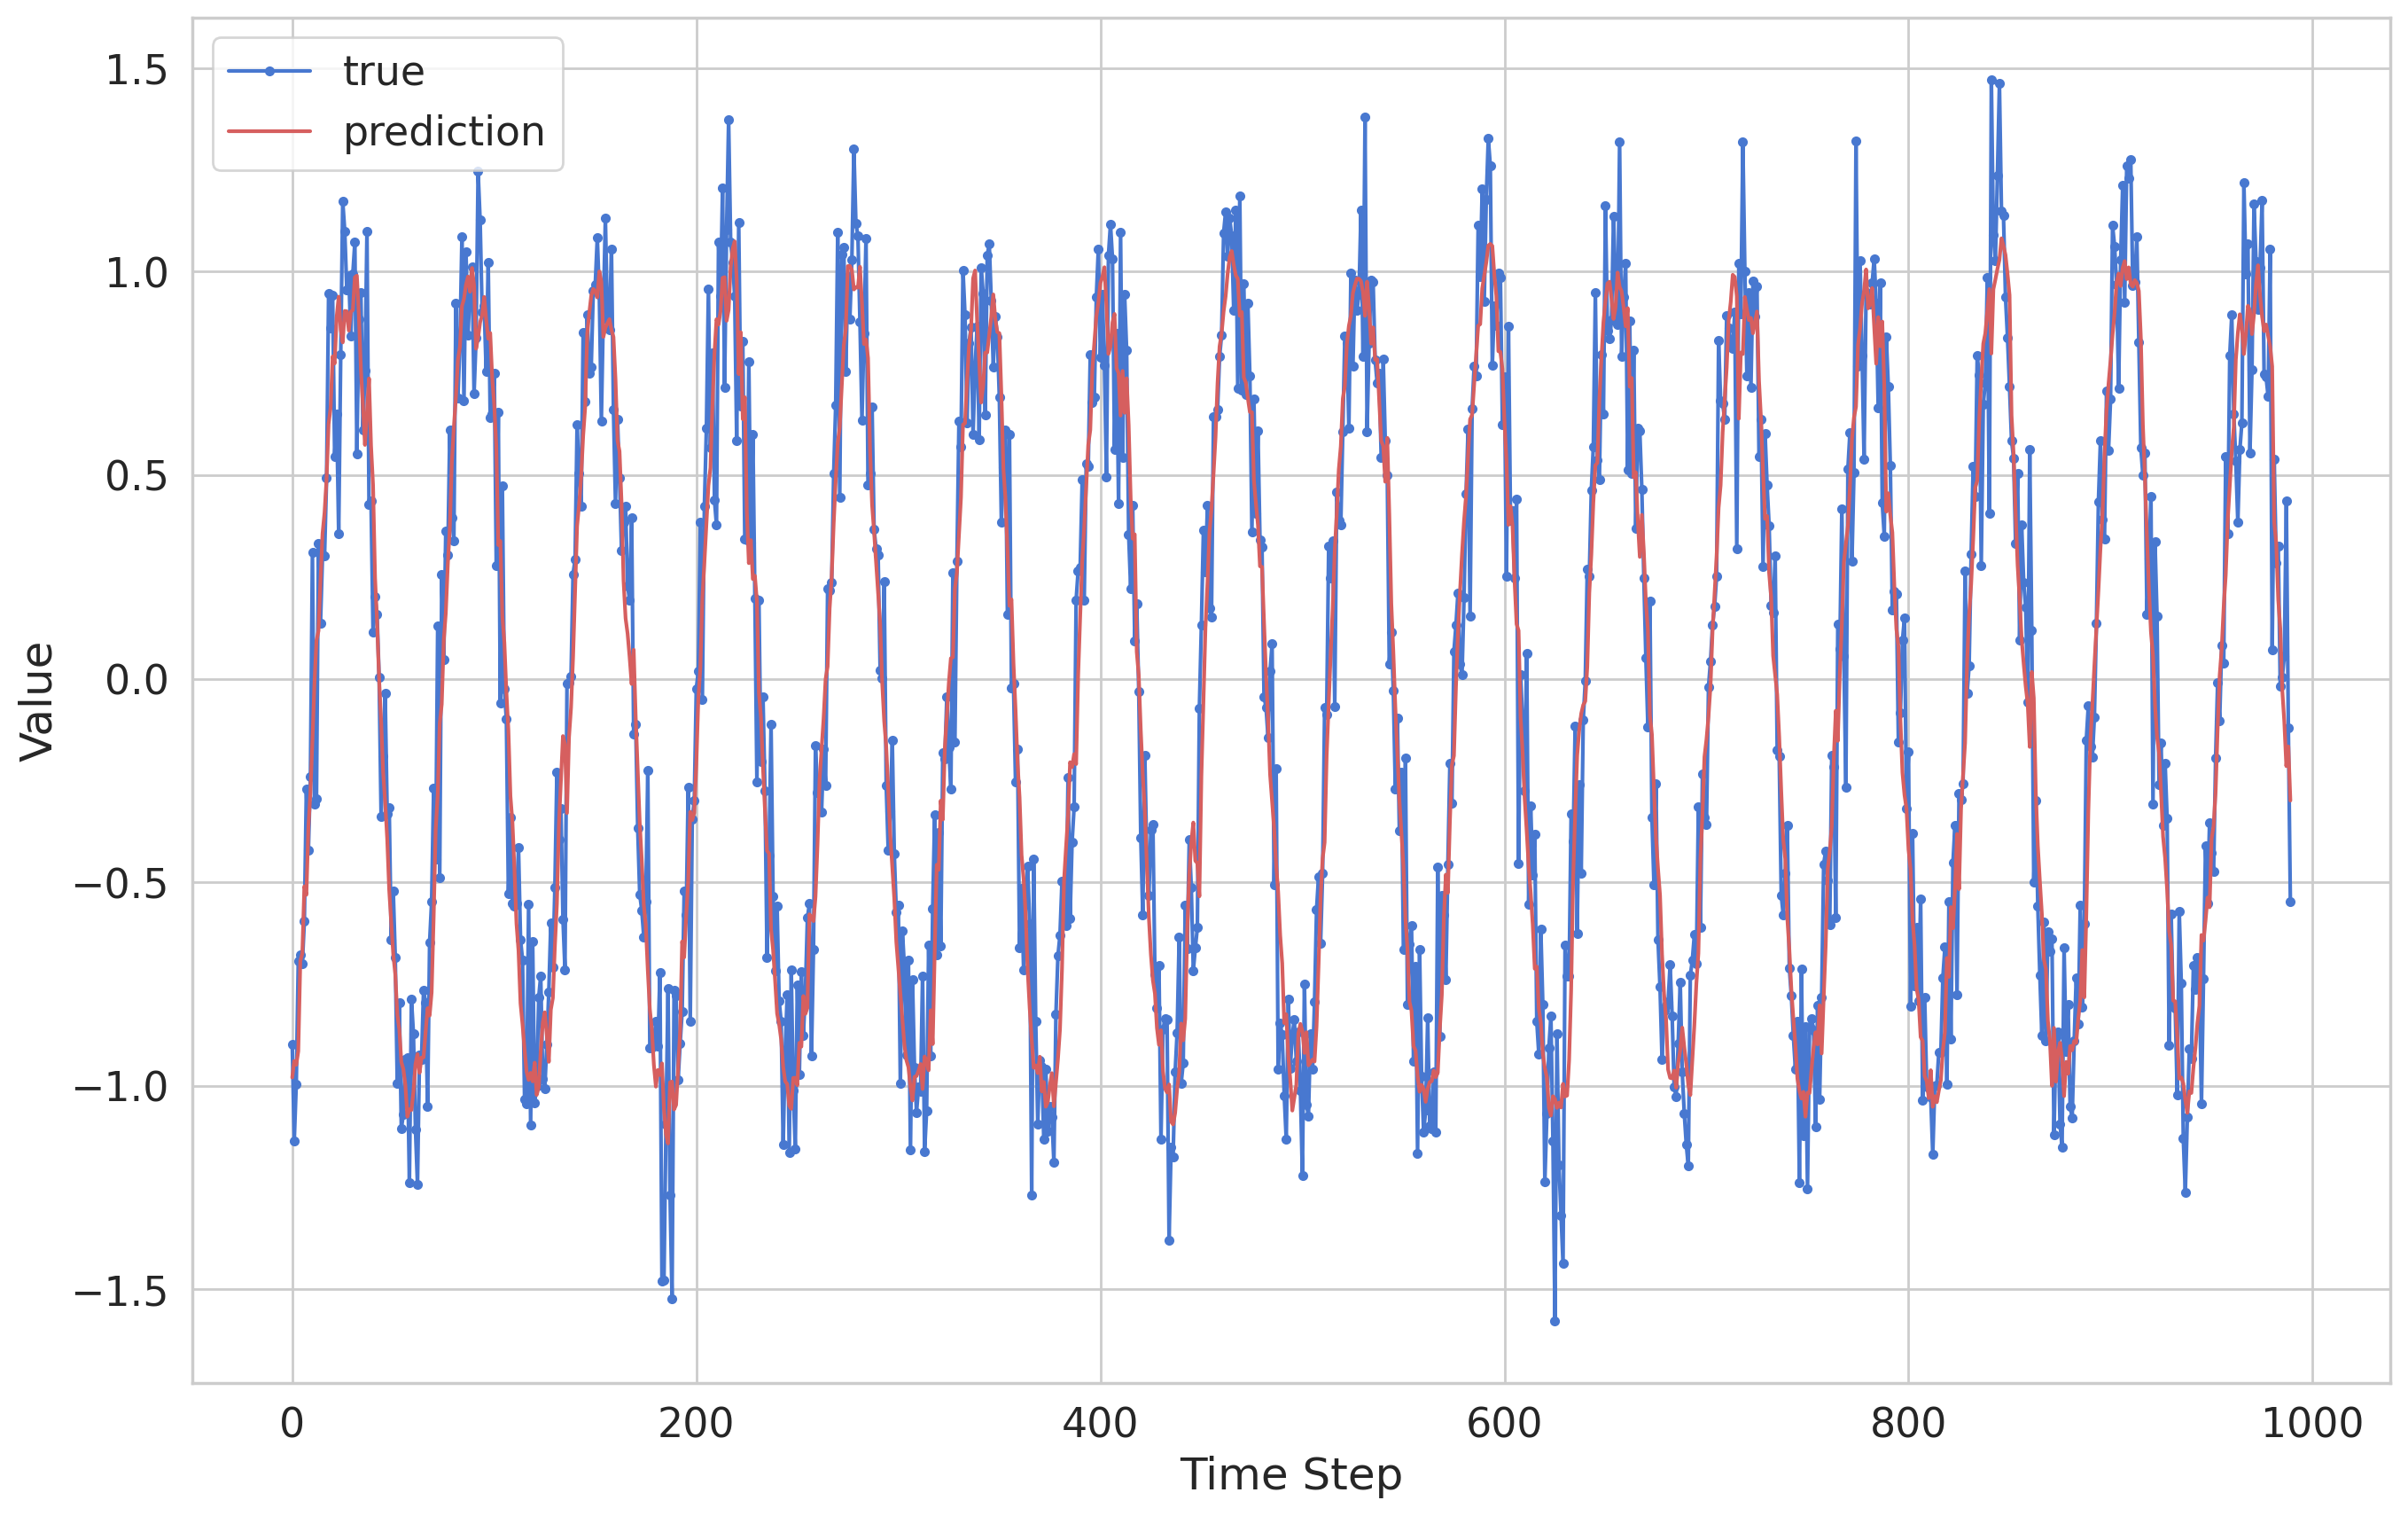

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Model Complexity

1800 1200
(1780, 20, 1) (1780,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,101 (4.30 KB)

 Trainable params: 1,101 (4.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1423 - val_loss: 0.0480
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0207 - val_loss: 0.0053
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084 - val_loss: 0.0054
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0079 - val_loss: 0.0203
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0134 - val_loss: 0.0189
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0120 - val_loss: 0.0052
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0043
Epoch 9/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067 - val_loss: 0.0046
Epoch 10/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 11/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 12/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

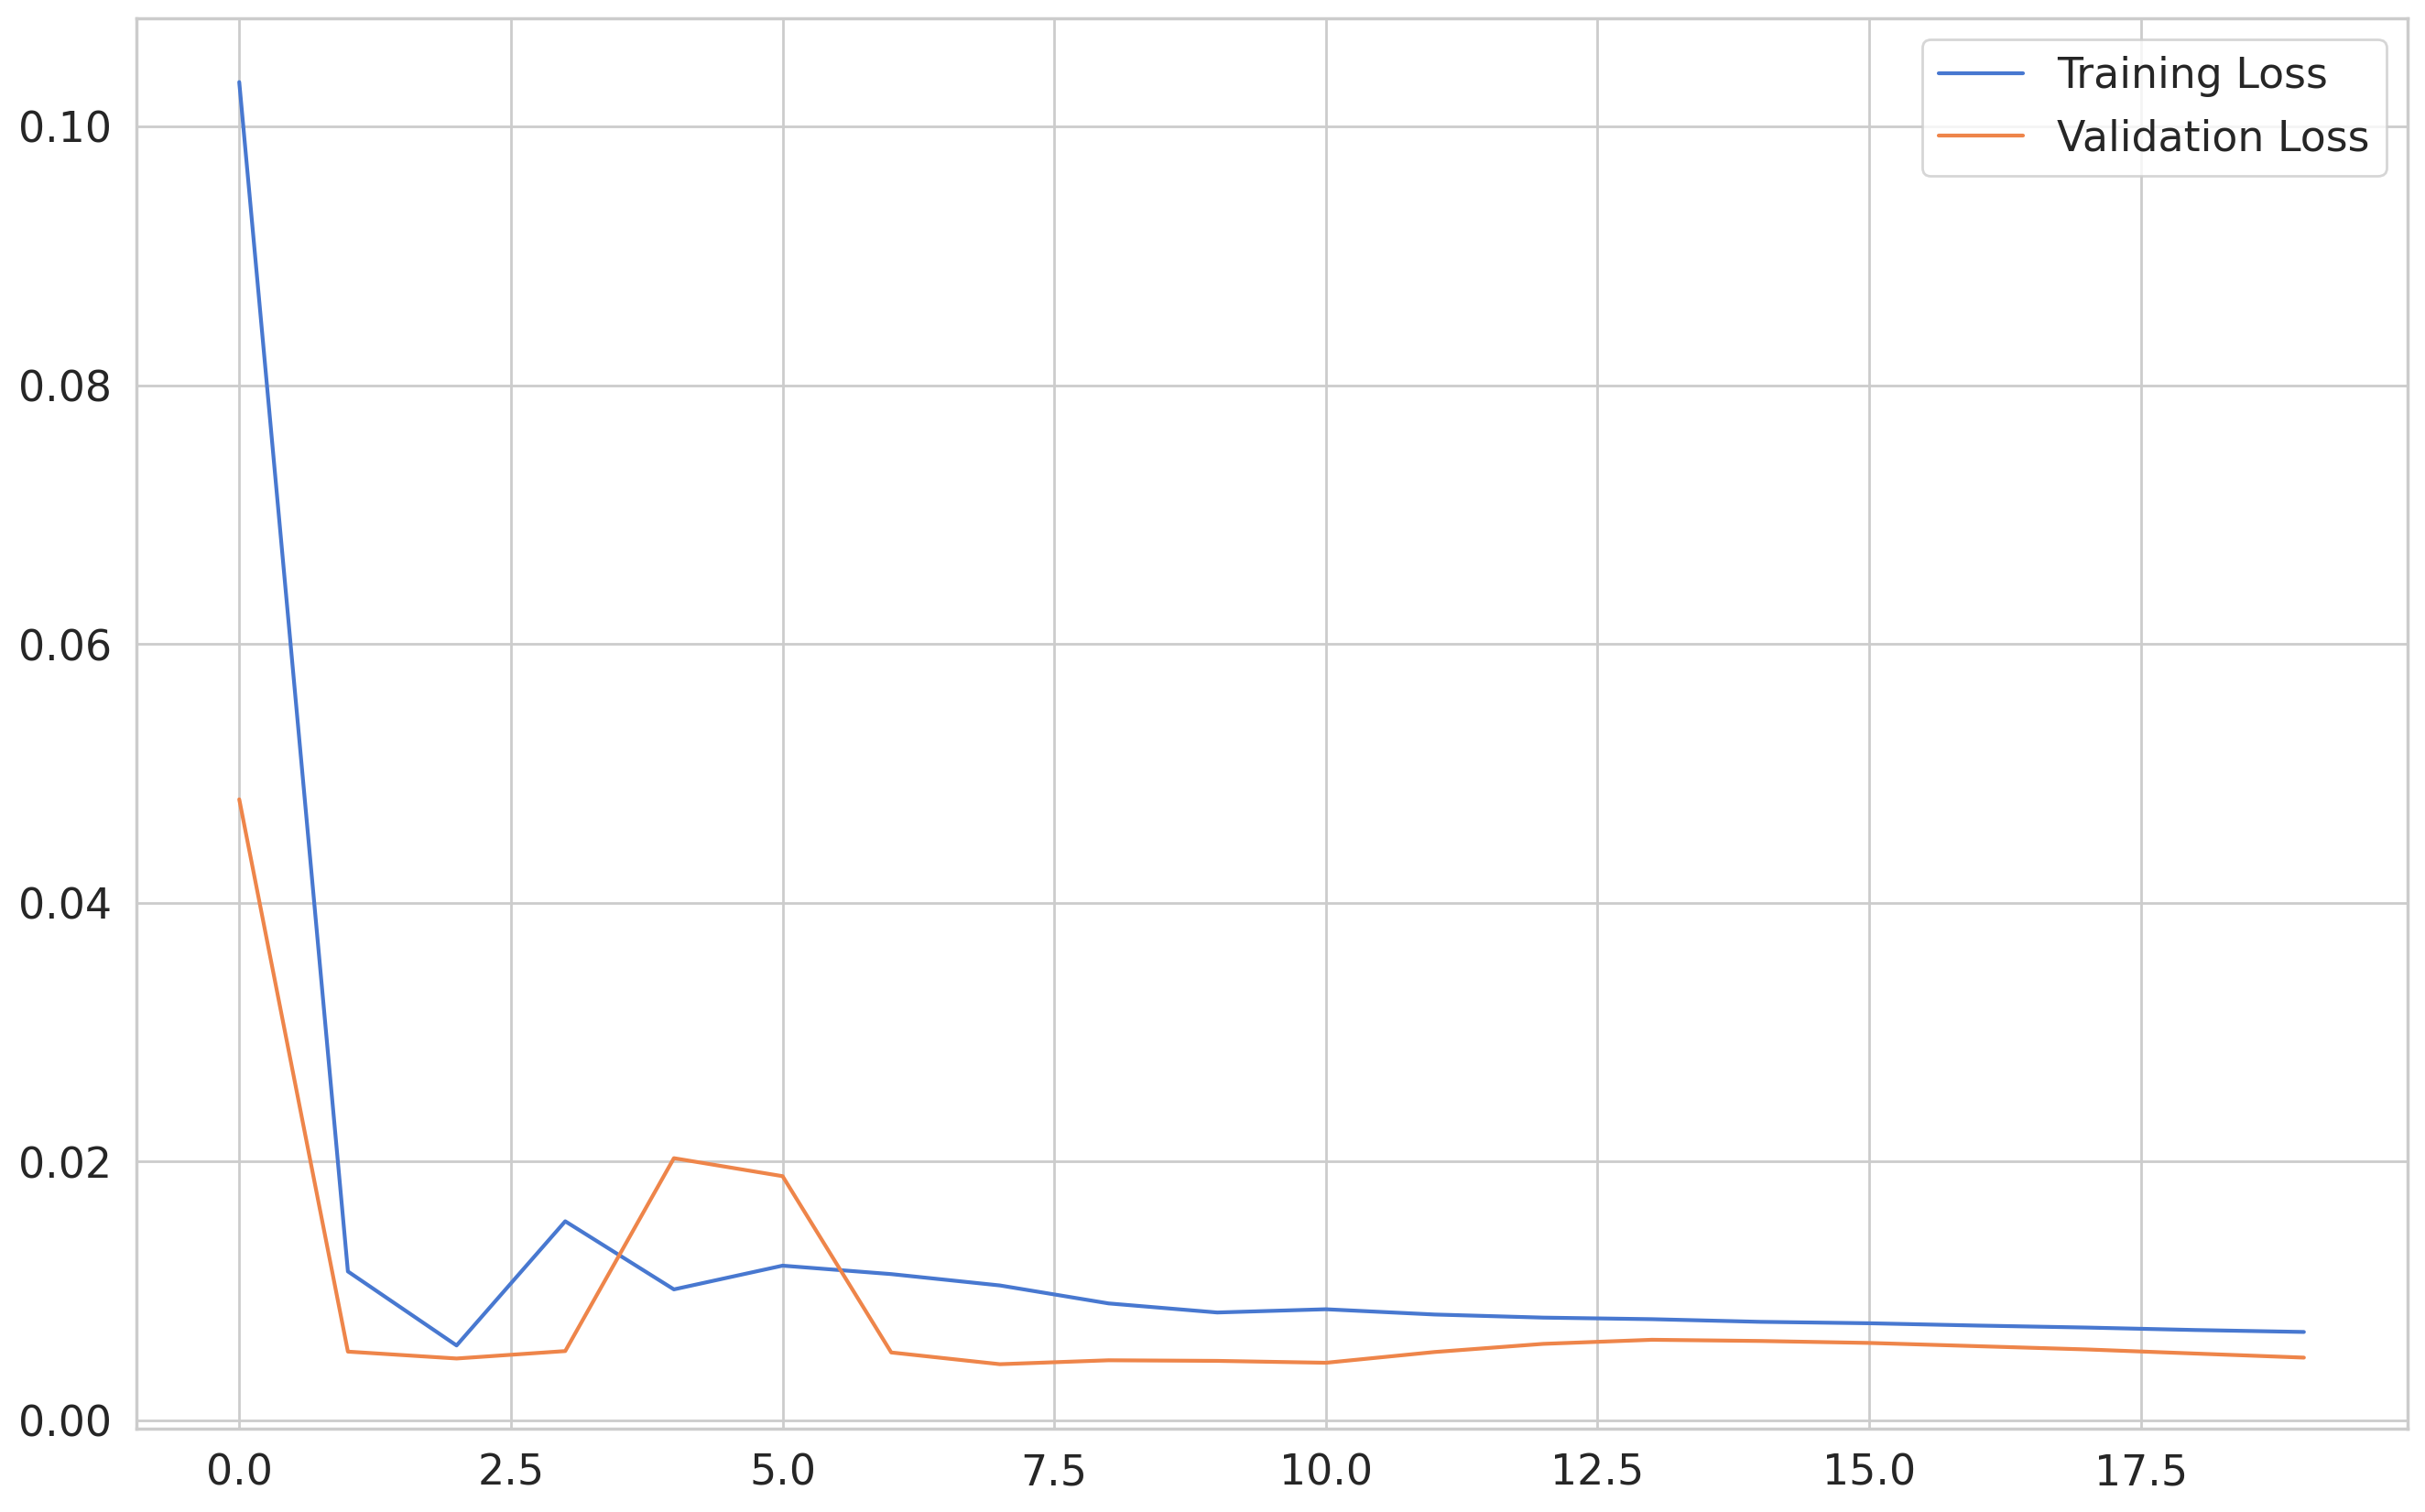

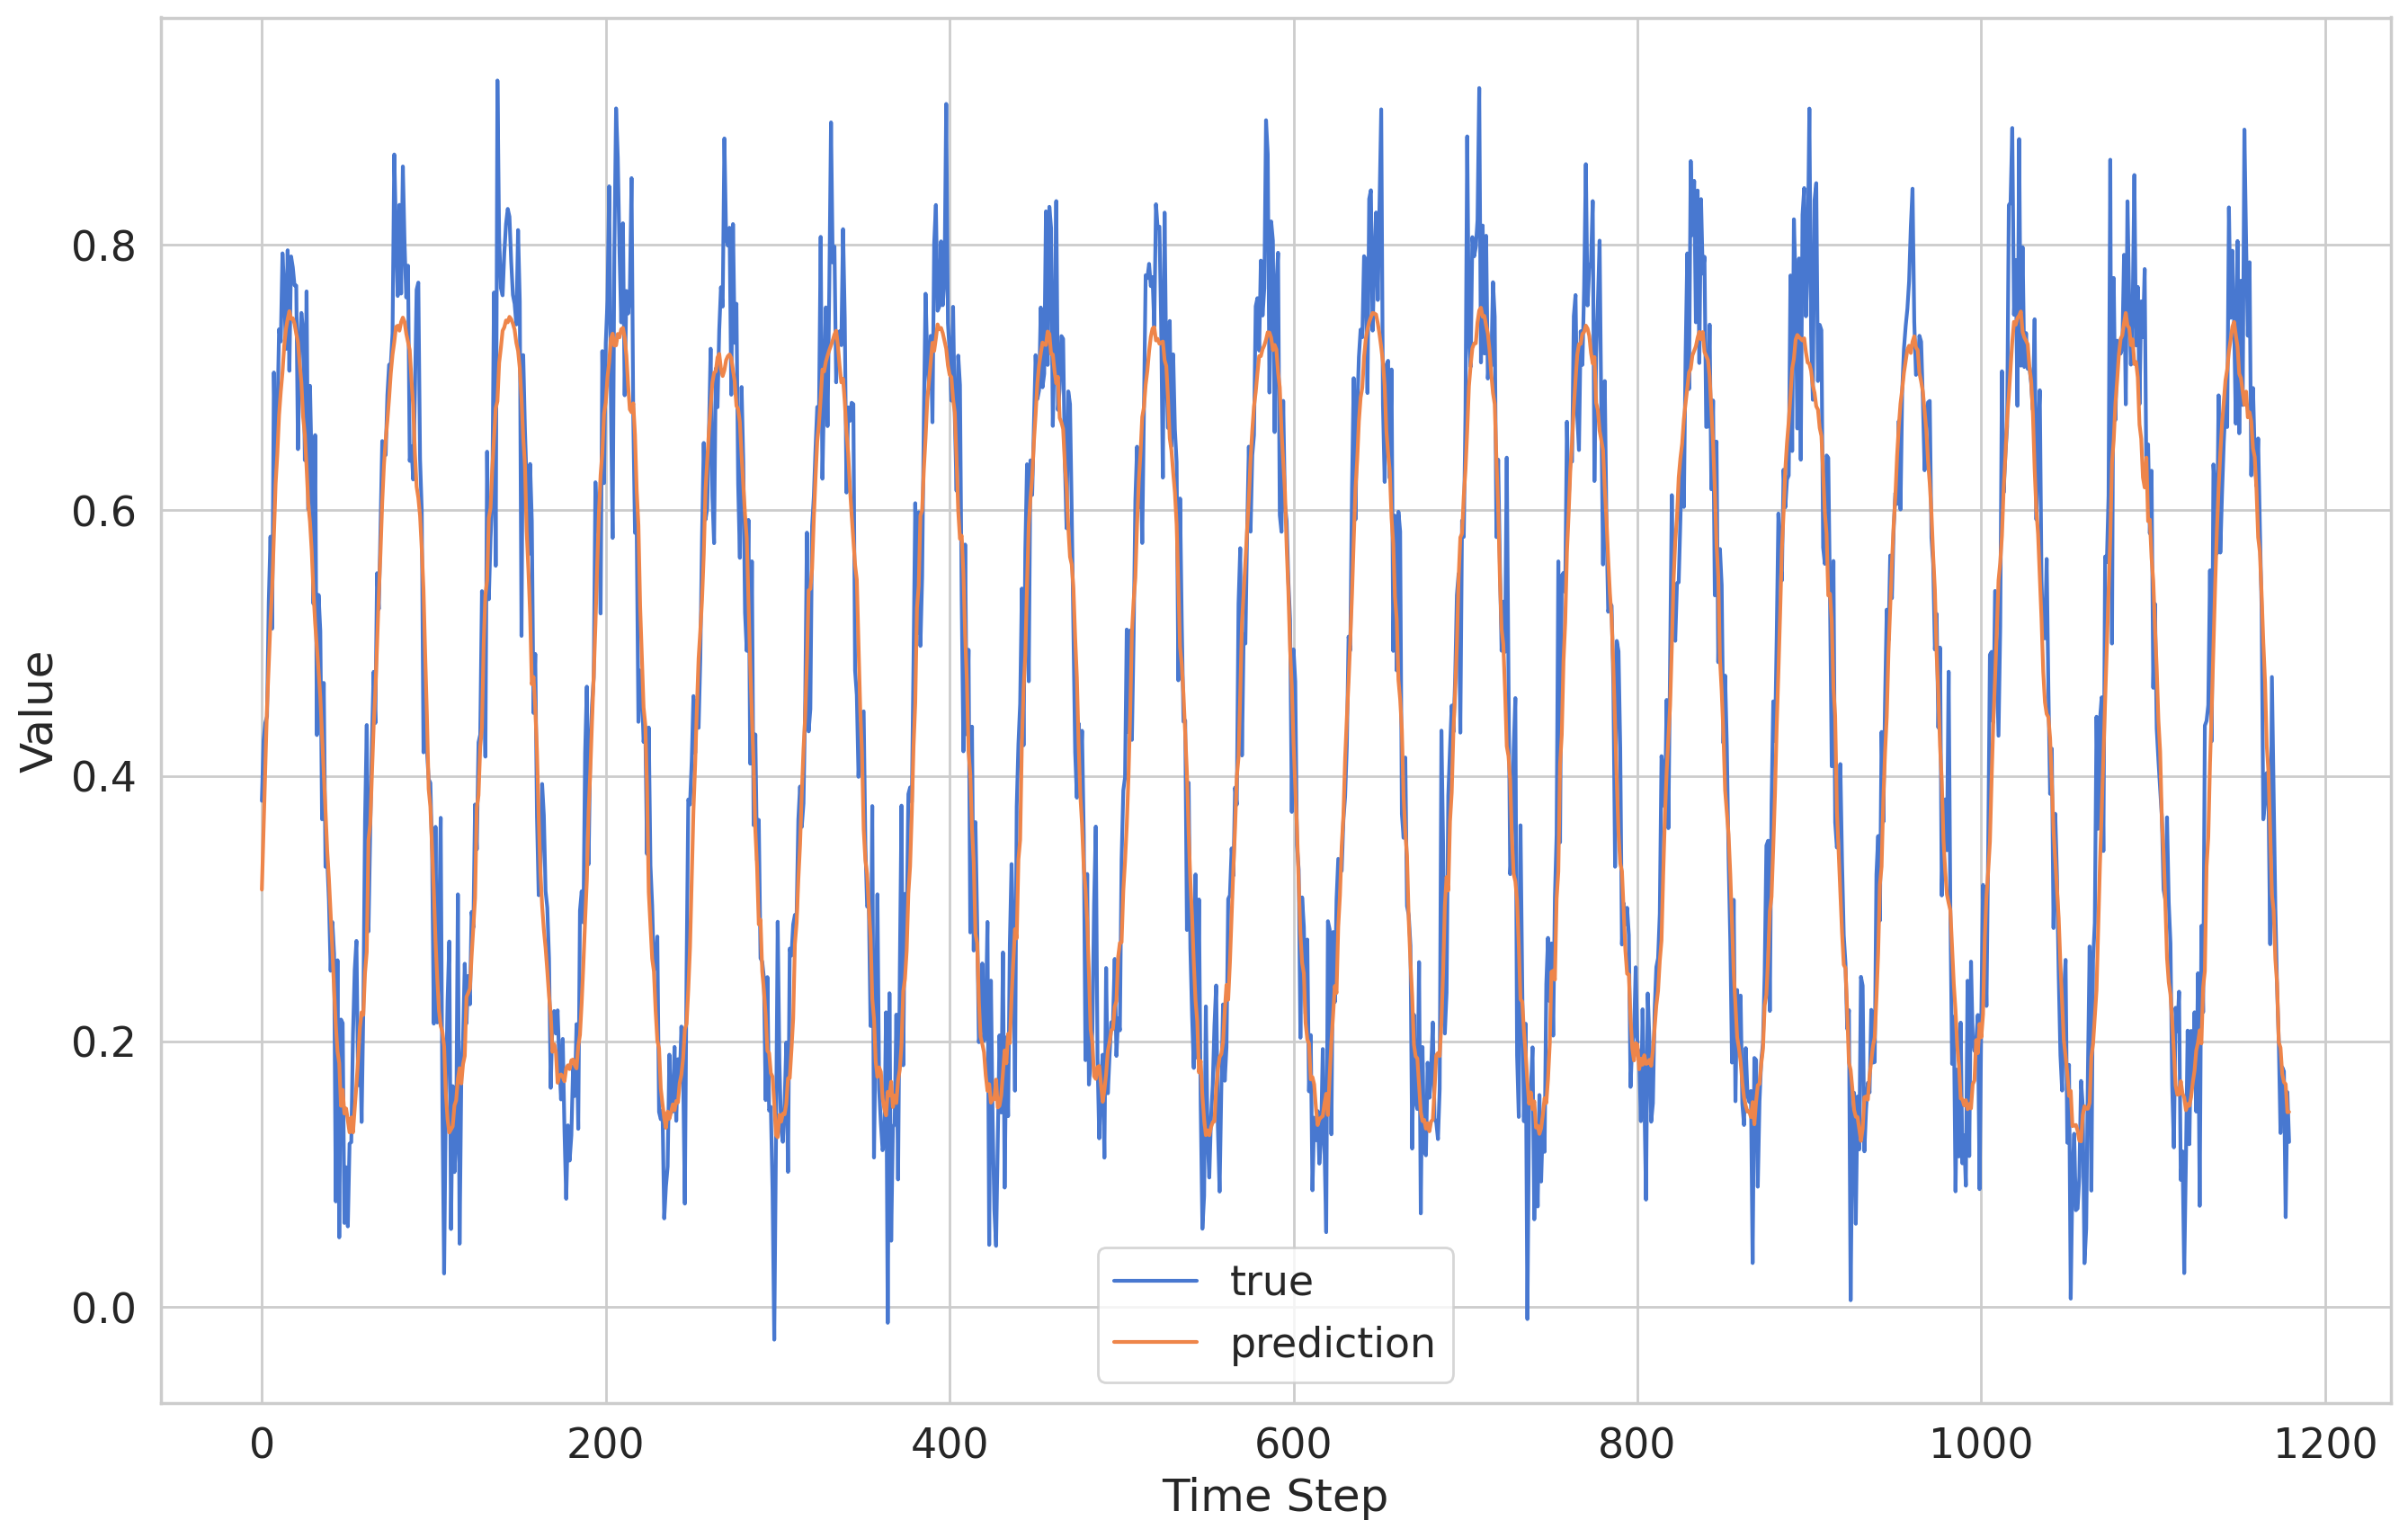

###### Prediction Errors #######
{'MSE': 0.005160716381646037, 'MAE': 0.05708562964484615, 'MAPE': 28.133643964190753}


In [ ]:
# MLP Model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
tf.random.set_seed(42)

# Data
train_percentage = 0.6

# MLP Hyperparameters
hiddenNeurons = 50
LR = 0.01
epochs = 20

# Regularization
use_regularizer = False
l2_lambda = 0.01 # 0.0001
dropout_rate = 0.1 # 0.2

# (!) Training Data Increase / Decrease
data_size = 300 # 500

# Params (batch size)
batch_size = 4

# Params (Sequence Length size)
time_steps = 20 # Sequence Length

# RNN Model?
rnn = False

# Generate Data
# Generate time series (sin function + random Gaussian noise)
time = np.arange(0, data_size, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.2, size=len(time))

df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()


# Train / Test Split
train_size = int(len(df) * train_percentage)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]


# Normalize Data
scaler = MinMaxScaler()

# Fit scaler, basically get min max :)
train = scaler.fit_transform(train)
train = pd.DataFrame(train,  columns=['sine'])

# Apply scaling to the testing data
test = scaler.transform(test)
test = pd.DataFrame(test, columns=['sine'])

print(len(train), len(test))



# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)



# Create a model

if rnn == False:
  if (use_regularizer):
    model = keras.Sequential()
    model.add(keras.layers.Dense(hiddenNeurons, activation=keras.activations.sigmoid, input_shape=(time_steps,), kernel_regularizer=keras.regularizers.l2(l2_lambda)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.AdamW(LR))
    model.add(keras.layers.Dropout(dropout_rate))

  else:
    model = keras.Sequential()
    model.add(keras.layers.Dense(hiddenNeurons, activation=keras.activations.sigmoid, input_shape=(time_steps,)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.AdamW(LR))
  model.summary()

else:
# # Recurrent Models
  model = keras.Sequential()
  model.add(keras.layers.LSTM(hiddenNeurons, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(LR))

  model.summary()


# Train the model
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

# Training History

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

# Predict

y_pred = model.predict(X_test)
y_pred.shape


# Plot Prediction
plt.figure()
plt.plot(y_test, label="true")
plt.plot(y_pred, label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()


# Compute Metrics

import numpy as np

def compute_errors(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)

    mse = mean_squared_error(y_test.flatten(), y_pred.flatten())
    mae = mean_absolute_error(y_test.flatten(), y_pred.flatten())
    mape = mean_absolute_percentage_error(y_test.flatten(), y_pred.flatten()) * 100


    return {"MSE": mse, "MAE": mae, "MAPE": mape}

errors = compute_errors(y_test, y_pred)


print("###### Prediction Errors #######")
print(errors)







